---
# **<font color='blue'>Trabajo de investigación Doctorado UAI</font>**
---

**Alumno:** Pablo Negro - Gonzalo Zabala - Néstor Balich



¿Qué es Sklearn SVM?

Las clases sklearn. svm. ... NuSVC permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que SVC controla la regularización a través del hiperparámetro C , mientras que NuSVC lo hace con el número máximo de vectores soporte permitidos.

Scikit-learn implementa Support Vector Machines para escenarios de clasificación en varias clases:

sklearn.svm.SVC
sklearn.svm.NuSVC
sklearn.svm.LinearSVC

SVC

SVC es la clase principal ofrecida por Scikit-learn. Está implementada sobre la librería libsvm y la función de coste viene determinada por el parámetro C que ya hemos visto. El parámetro kernel especifica el tipo de kernel a usar. Las implementaciones nativas son "linear", "poly", "rbf" y "sigmoid". También es posible usar kernels desarrollados a medida.

NuSVC

En lugar de utilizar el parámetro C, NuSVC utiliza el parámetro nu que controla el número de vectores de soporte.

LinearSVC

Semejante a SVC con el parámetro kernel="linear" (único kernel soportado). En lugar de estar implementado con libsvm, lo está con liblinear lo que supone más flexibilidad en la asignación de penalizaciones y funciones de coste. Según la documentación de Scikit-learn, esta implementación debería ofrecer mejor rendimiento que SVC cuando se trabaja con gran número de muestras.

In [1]:
def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="binary")
    )
    print("Accuracy: ", accuracy_score(y_test, y_pred) )
    print("Precision: ", precision_score(y_test, y_pred, average="binary"))
    print("Recall: ", recall_score(y_test, y_pred, average="binary"))
    print("-" * 10)
    print()
    
from sklearn.metrics import confusion_matrix
def matriz_confusion(train, pred,title= "Matriz de confusión"):
    import seaborn as sns
    import matplotlib.pyplot as plt 
    cm = confusion_matrix(train, pred)

    print("\n")
    # plt.figure(figsize=(10,6))  
    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(8, 4))

    # ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

   
    # labels, title and ticks
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 

    ax.set_title(f'Confusion Matrix {title}'); 
    ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);
    fig.tight_layout()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,accuracy_score
def metricas_modelo(Xtrain, Ytrain,train,pred, title="Metricas del modelo",view=0):
    matriz = confusion_matrix(train,pred )
    exactitud = round(100*accuracy_score(train, pred),2)
    precision = round(100*precision_score(train,pred),2)
    sensibilidad = round(100*recall_score(train, pred),2)
    puntaje = round(100*f1_score(train, pred),2)
    error_clasificacion = round(100*(train != pred).mean(),2)
 

    if view == 0 or view == 1:
        print ("\n ********** ",title ," *************")
        print("\nNumber of training samples:", len(Xtrain))
        print("Unlabeled samples in training set:", sum(1 for x in Ytrain if x == -1))
        
        print("\nNumber of test samples:", len(train))
        print("Unlabeled samples in training set:", sum(1 for x in pred if x == -1))
        print(f"\nClassifications true: {(train == pred).sum()}")
        print(f"Classifications false: {(train != pred).sum()}")
        print(f"Classifications error: {error_clasificacion}%")
        print(f"\nF1 score (Puntaje)   : {puntaje}%")
        print(f"Accuracy (Exactitud) : {exactitud}%")
        print(f"Precision (Precision): {precision}%")
        print(f"Recall (Sensibilidad): {sensibilidad}%")
        # print("Matrix confusion: \n", matriz)
    if view == 0 or view == 2:
        matriz_confusion(train, pred,title)

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from nltk.corpus import stopwords

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('stopwords')
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import pandas as pd
url_scopus = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dfscopus.csv"

url_norm_lemati ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dtnormlemati.csv"
url_train_lemati = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dtrainlemati.csv"

url_norm_estemi ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dtnormestemi.csv"
url_train_estemi = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dtrainestemi.csv"

df_scopus = pd.read_csv(url_scopus, encoding='latin-1', sep=',')
df_norm_lemati= pd.read_csv(url_norm_lemati, encoding='latin-1', sep=',')
df_norm_estemi= pd.read_csv(url_norm_estemi, encoding='latin-1', sep=',')
df_train_lemati= pd.read_csv(url_train_lemati, encoding='latin-1', sep=',')
df_train_estemi= pd.read_csv(url_train_estemi, encoding='latin-1', sep=',')

# df_sel = df_nlema

In [6]:
print(f"df_scopus {df_scopus.shape}\ndf_norm_lemati{df_norm_lemati.shape} train_lemati{df_train_lemati.shape} \ndf_norm_estemi{df_norm_estemi.shape} df_train_estemi{df_train_estemi.shape}")

df_scopus (700, 16)
df_norm_lemati(665, 10) train_lemati(232, 2) 
df_norm_estemi(665, 10) df_train_estemi(206, 2)


In [124]:
dsEntrenamiento=pd.concat([df_sel[df_sel['include?']==1][0:30],df_sel[df_sel['include?']==0][0:30]], axis=0 )
dfSubset=dsEntrenamiento[["text_to_proc", "include?"]]

dfUnseen = df_sel[~df_sel.index.isin(dfSubset.index)]

Es importante verificar que la proporción de cada grupo es similar en el set de entrenamiento y en el de test.

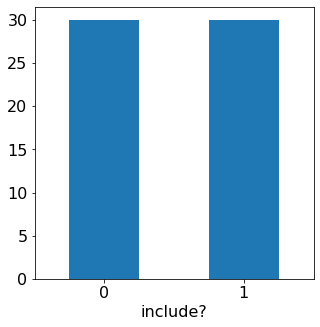

In [125]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
dfSubset.groupby('include?')['include?'].count().plot.bar(ylim=0)
plt.xticks(rotation=0)
plt.show()

# ----------- Pruebas SVC -------------

https://www.cienciadedatos.net/documentos/py25-text-mining-python.html


In [126]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

import re
def get_only_chars(line):
    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

In [127]:
# Se aplica la función de limpieza y tokenización a cada tweet
# ==============================================================================
dfSubset['texto_tokenizado'] = dfSubset['text_to_proc'].apply(lambda x: limpiar_tokenizar(x))
dfSubset[['text_to_proc', 'texto_tokenizado']].head()

,text_to_proc,texto_tokenizado
0,Burbaite R. lego nxt robotbase learn environme...,"[burbaite, lego, nxt, robotbase, learn, enviro..."
2,Horn M. tangible interaction learn case hybrid...,"[horn, tangible, interaction, learn, case, hyb..."
7,Kwon D. algorithmic bricks tangible robot prog...,"[kwon, algorithmic, bricks, tangible, robot, p..."
12,Mason R. mindstorm robot application cognitive...,"[mason, mindstorm, robot, application, cogniti..."
13,Touretzky D. robotic computer scientist big ...,"[touretzky, robotic, computer, scientist, big,..."


In [128]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
dfSubset_tidy = dfSubset.explode(column='texto_tokenizado')
dfSubset_tidy = dfSubset_tidy.drop(columns='text_to_proc')
dfSubset_tidy = dfSubset_tidy.rename(columns={'texto_tokenizado':'token'})
dfSubset_tidy

,include?,token
0,1,burbaite
0,1,lego
0,1,nxt
0,1,robotbase
0,1,learn
...,...,...
43,0,calgary
43,0,zdm
43,0,mathematics
43,0,education


In [129]:
# Palabras totales utilizadas por cada include?
# ==============================================================================
print('--------------------------')
print('Palabras totales por include?')
print('--------------------------')
dfSubset_tidy.groupby(by='include?')['token'].count()

--------------------------
Palabras totales por include?
--------------------------


include?
0    3870
1    3367
Name: token, dtype: int64

In [130]:
# Palabras distintas utilizadas por cada include?
# ==============================================================================
print('----------------------------')
print('Palabras distintas por include?')
print('----------------------------')
dfSubset_tidy.groupby(by='include?')['token'].nunique()

----------------------------
Palabras distintas por include?
----------------------------


include?
0    1442
1    1121
Name: token, dtype: int64

In [131]:
# Top 5 palabras más utilizadas por cada include?
# ==============================================================================
dfSubset_tidy.groupby(['include?','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('include?') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

include?        token  count
include?                                   
0        1264         0       system     58
         1244         0      student     53
         1362         0          use     44
         1031         0  programming     42
         678          0      journal     41
1        2241         1  programming    104
         2311         1        robot     66
         2314         1      robotic     56
         2510         1          use     54
         2398         1      student     53

In [132]:
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
# stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [133]:
# Filtrado para excluir stopwords
# ==============================================================================
dfSubset_tidy = dfSubset_tidy[~(dfSubset_tidy["token"].isin(stop_words))]

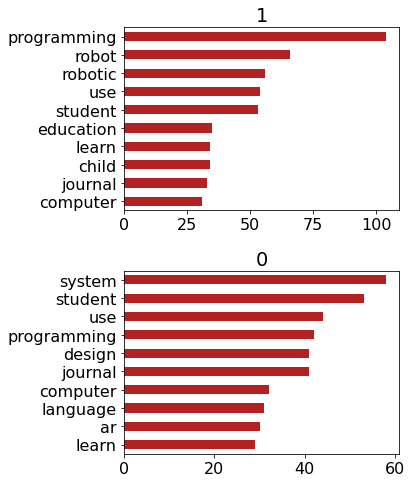

In [134]:
# Top 10 palabras por include
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 7))
for i, include in enumerate(dfSubset_tidy['include?'].unique()):
    df_temp = dfSubset_tidy[dfSubset_tidy['include?'] == include]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(include)

fig.tight_layout()

In [135]:
# Pivotado de datos correlacion entre includes
# ==============================================================================
dfSubset_pivot = dfSubset_tidy.groupby(["include?","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="include?", values= "count")
dfSubset_pivot.columns.name = None

Una forma de cuantificar la similitud entre los include es calculando la correlación en el uso de palabras.La idea es que, si dos categorias escriben de forma similar, tenderán a utilizar las mismas palabras y con frecuencias similares. La medida de similitud más utilizada al trabajar con texto es 1 - distancia coseno.

In [136]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

dfSubset_pivot.corr(method=similitud_coseno)

,0,1
0,1.000000,0.781365
1,0.781365,1.000000


In [137]:
dfSubset_pivot[0]

token
ability            2.0
able               2.0
aboard             NaN
abroad             NaN
abstract           2.0
                  ... 
zoo                NaN
zr                 NaN
zum                2.0
zunehmenden        1.0
zusammenfassung    1.0
Name: 0, Length: 2008, dtype: float64

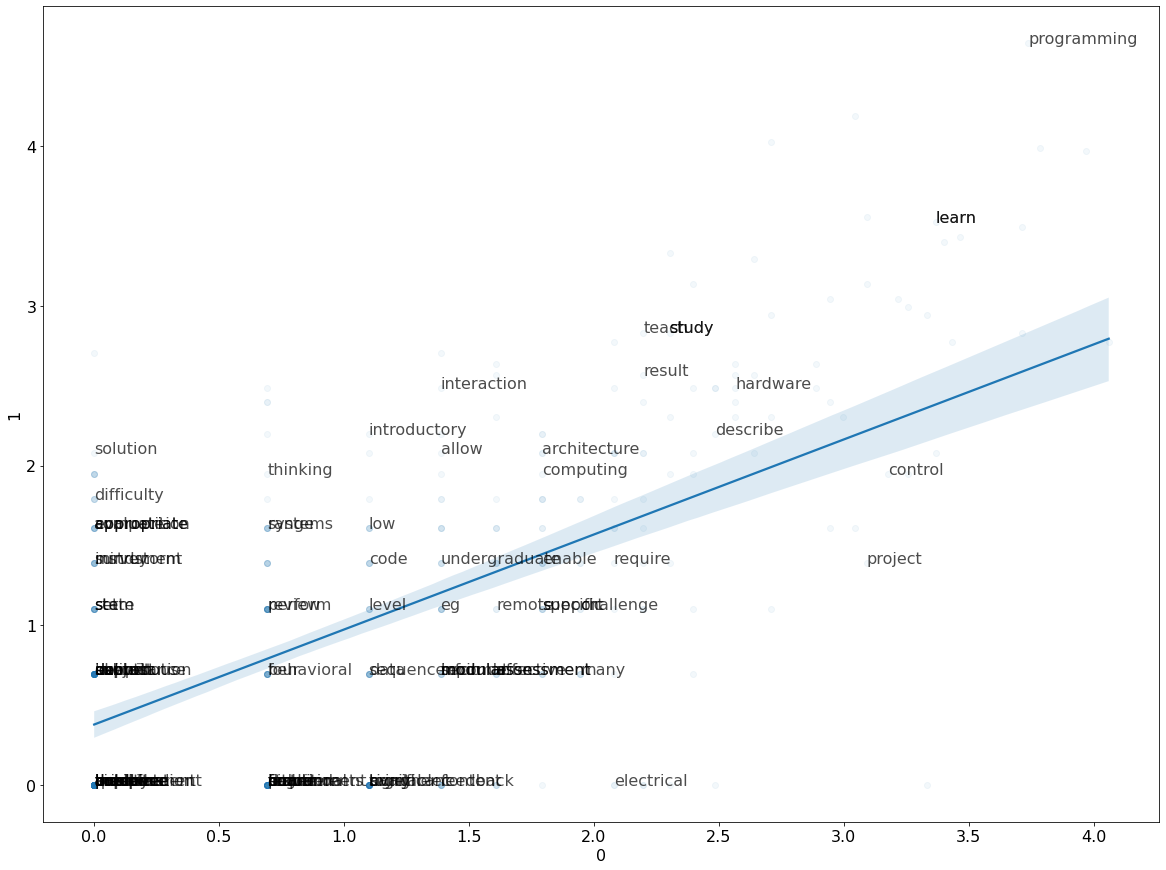

In [138]:
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(20, 15))
temp = dfSubset_pivot.dropna()
sns.regplot(
    x  = np.log(temp[0]),
    y  = np.log(temp[1]),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
)
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(temp.index[i],
        xy=(np.log(temp[0][i]), np.log(temp[1][i])),
        alpha = 0.7
    )


In [139]:
# Número de palabras comunes
# ==============================================================================
include_0 = set(dfSubset_tidy[dfSubset_tidy['include?'] == 0]['token'])
include_1 = set(dfSubset_tidy[dfSubset_tidy['include?'] == 1]['token'])

print(f"Palabras comunes entre include=0 y include=1: {len(include_1.intersection(include_0))}")

Palabras comunes entre include=0 y include=1: 535


In [140]:
# Cálculo del log of odds ratio de cada palabra por include
# ==============================================================================
# Pivotaje y despivotaje
dfSubset_pivot = dfSubset_tidy.groupby(["include?","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="include?", values= "count")

dfSubset_pivot = dfSubset_pivot.fillna(value=0)
dfSubset_pivot.columns.name = None

dfSubset_unpivot = dfSubset_pivot.melt(value_name='n', var_name='include?', ignore_index=False)
dfSubset_unpivot = dfSubset_unpivot.reset_index()

# Selección de los autores elonmusk y mayoredlee
dfSubset_unpivot = dfSubset_unpivot[dfSubset_unpivot["include?"].isin([0, 1])]

# Se añade el total de palabras de cada autor
dfSubset_unpivot = dfSubset_unpivot.merge(
                    dfSubset_tidy.groupby('include?')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'include?'
                 )

# Cálculo de odds y log of odds de cada palabra
dfSubset_logOdds = dfSubset_unpivot.copy()
dfSubset_logOdds['odds'] = (dfSubset_logOdds.n + 1) / (dfSubset_logOdds.N + 1)
dfSubset_logOdds = dfSubset_logOdds[['token', 'include?', 'odds']] \
                    .pivot(index='token', columns='include?', values='odds')
dfSubset_logOdds.columns.name = None

dfSubset_logOdds['log_odds']     = np.log(dfSubset_logOdds[0]/dfSubset_logOdds[1])
dfSubset_logOdds['abs_log_odds'] = np.abs(dfSubset_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de Elon Musk. Esto es así porque el ratio sea ha
# calculado como elonmusk/mayoredlee.
dfSubset_logOdds['include_frecuente'] = np.where(dfSubset_logOdds.log_odds > 0,
                                              0,
                                              1
                                    )

In [141]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
dfSubset_logOdds.sort_values('abs_log_odds', ascending=False).head(150)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,0,1,log_odds,abs_log_odds,include_frecuente
token,,,,,
child,0.000262,0.010520,-3.691169,3.691169,1
tangible,0.000262,0.008115,-3.431657,3.431657,1
weld,0.004986,0.000301,2.808618,2.808618,0
childhood,0.000262,0.003907,-2.700770,2.700770,1
semantic,0.004461,0.000301,2.697393,2.697393,0
...,...,...,...,...,...
great,0.001312,0.000301,1.473617,1.473617,0
robotic,0.004198,0.017133,-1.406283,1.406283,1
project,0.006035,0.001503,1.390236,1.390236,0


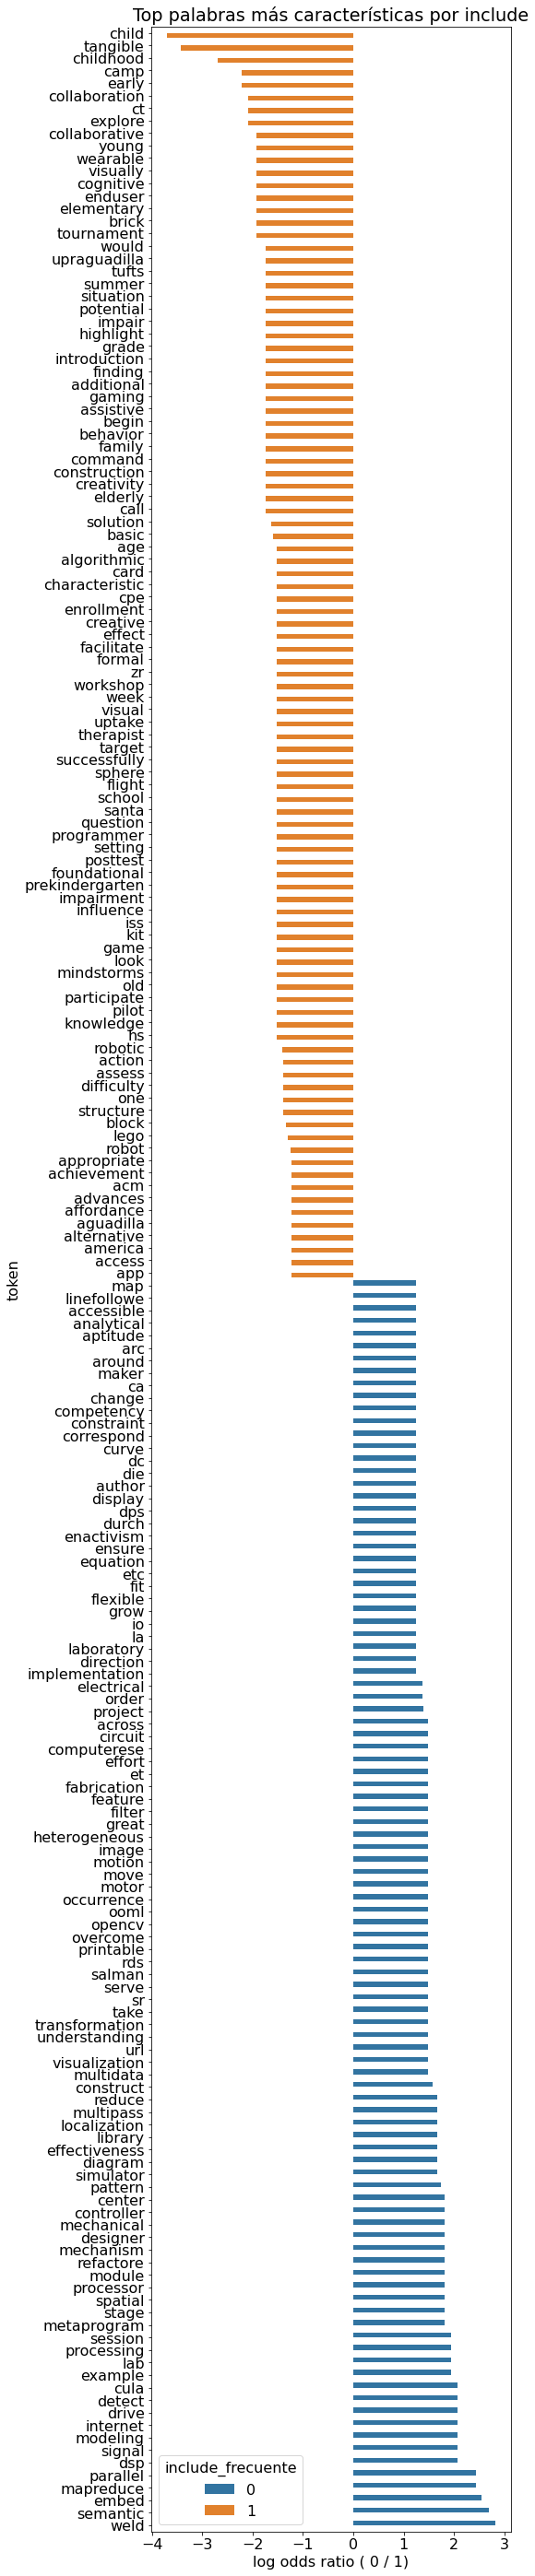

In [142]:
# Top 100 palabras más características por include
# ==============================================================================

top_ = dfSubset_logOdds[['log_odds', 'abs_log_odds', 'include_frecuente']] \
        .groupby('include_frecuente') \
        .apply(lambda x: x.nlargest(100, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(7, 50))
sns.barplot(
    x    = 'log_odds',
    y    = 'token',
    hue  = 'include_frecuente',
    data = top_,
    ax   = ax
)
ax.set_title('Top palabras más características por include')
ax.set_xlabel('log odds ratio ( 0 / 1)');

# Clasificacion

In [143]:
# X_train, X_test, y_train, y_test = train_test_split(dfSubset['text_to_proc'], dfSubset['include?'], random_state = 42)

# Reparto train y test
# ==============================================================================
datos_X = dfSubset['text_to_proc']
datos_y = dfSubset['include?']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.7,
    random_state = 42,
    stratify=dfSubset['include?']
)

In [144]:
X_train.head

<bound method NDFrame.head of 40    Ramirez-Benavides K. modebot environment progr...
75    Chen G. assess elementary student computationa...
11    RodrÃÂ­guez-ResÃÂ©ndiz J. approach motion co...
19    Mysorewala M. projectbased strategy teach robo...
0     Burbaite R. lego nxt robotbase learn environme...
39    Strawhacker A. i want robot look food compare ...
14    Larraza-Mendiluze E. gameconsolebased project ...
17    Barakova E. enduser programming architecture f...
31    Danahy E. legobased robotic high education   y...
21    Flannery L. let dance robot hokeypokey   child...
24    Gonzalez J. use videogaming devices motivation...
27    Vilajosana X. arp remote experience real embed...
41    Stoppe J. analyze system design system analysi...
35    BilÃÂ©n S.G. softwaredefined radio new paradi...
36    Ã
Â tuikys V. refactore heterogeneous metaprog...
81    Mondada F. bring robotic formal education thym...
69    Dos Santos Lopes M.S. web environment programm...
42    Elaasar M. p

In [145]:
#porcentaje
value, counts = np.unique(y_train, return_counts=True)
print("y_train: ", dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print("y_test: ",dict(zip(value, 100 * counts / sum(counts))))

print("y_train: ", y_test.shape)
print("y_test: ", y_test.shape)

y_train:  {0: 50.0, 1: 50.0}
y_test:  {0: 50.0, 1: 50.0}
y_train:  (42,)
y_test:  (42,)


In [146]:
stop_words = list(stopwords.words('english'))
# Se añade la stopword: amp, ax, ex
# stop_words.extend(("amp", "xa", "xe"))

In [147]:
# Creación de la matriz tf-idf
# ==============================================================================
tfidf_vectorizador = TfidfVectorizer(
                        tokenizer  = limpiar_tokenizar,
                        min_df     = 3,
                        stop_words = stop_words
                    )
tfidf_vectorizador.fit(X_train)

TfidfVectorizer(min_df=3,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function limpiar_tokenizar at 0x7f0266034ef0>)

In [148]:
tfidf_train = tfidf_vectorizador.transform(X_train)
tfidf_test  = tfidf_vectorizador.transform(X_test)

In [149]:
print(f" Número de tokens creados: {len(tfidf_vectorizador.get_feature_names())}")
print(tfidf_vectorizador.get_feature_names()[:10])

 Número de tokens creados: 147
['allow', 'also', 'analysis', 'application', 'apply', 'approach', 'ar', 'area', 'article', 'base']


#Modelo SVM.SVC lineal

https://www.cienciadedatos.net/documentos/py24-svm-python.html

Máquinas de Vector Soporte (Vector Support Machines, SVMs) es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

En Scikit Learn pueden encontrarse tres implementaciones distintas del algoritmo Suport Vector Machine:

Las clases sklearn.svm.SVC y sklearn.svm.NuSVC permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que SVC controla la regularización a través del hiperparámetro C, mientras que NuSVC lo hace con el número máximo de vectores soporte permitidos.

La clase sklearn.svm.LinearSVC permite ajustar modelos SVM con kernel lineal. Es similar a SVC cuando el parámetro kernel='linear', pero utiliza un algoritmo más rápido.



¿Cuál es la diferencia entre SVC y SVM en scikit-learn?

Son simplemente diferentes implementaciones del mismo algoritmo. El módulo SVM (SVC, NuSVC, etc.) es un contenedor de la biblioteca libsvm y admite diferentes núcleos, mientras que LinearSVCse basa en liblinear y solo admite un núcleo lineal. Entonces:

SVC(kernel = 'linear')
es en teoría "equivalente" a:

LinearSVC()
Debido a que las implementaciones son diferentes en la práctica, obtendrá resultados diferentes, los más importantes son que LinearSVC solo admite un kernel lineal, es más rápido y puede escalar mucho mejor.

https://www.cienciadedatos.net/documentos/py25-text-mining-python.html


In [150]:
# 
# Entrenamiento del modelo SVM
# ==============================================================================
from sklearn import svm

modelo_svm_lineal_SVC = svm.SVC(kernel= "linear", C = 1.0)
modelo_svm_lineal_SVC.fit(X=tfidf_train, y= y_train)

# modelo_svm_lineal_NuSVC = svm.NuSVC(cache_size=200, class_weight=None, coef0=0.0,
#       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#       max_iter=-1, nu=0.5, probability=False, random_state=None,
#       shrinking=True, tol=0.001, verbose=False)
# modelo_svm_lineal_NuSVC.fit(X=tfidf_train, y= y_train)

# modelo_svm_lineal_SVC = svm.SVC()
# modelo_svm_lineal_SVC.fit(X=tfidf_train, y= y_train)

SVC(kernel='linear')

In [151]:
# predicciones_test1 = modelo_svm_lineal_NuSVC.predict(X=tfidf_test)
# predicciones_test2 = modelo_svm_lineal_SVC.predict(X=tfidf_test)
# predicciones_test3 = modelo_svm_lineal_SVC.predict(X=tfidf_test)

In [152]:
from sklearn.model_selection import GridSearchCV
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = svm.SVC(kernel= "linear"),
        param_grid = param_grid,
        scoring    = 'f1',
        n_jobs     = -1,
        cv         = 5, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = tfidf_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
99,1000,1.00,0.000000,1.00000,0.000000
81,35.1119,1.00,0.000000,1.00000,0.000000
79,24.2013,1.00,0.000000,1.00000,0.000000
78,20.0923,1.00,0.000000,1.00000,0.000000
77,16.681,1.00,0.000000,1.00000,0.000000
...,...,...,...,...,...
30,0.00265609,0.66,0.377359,0.73913,0.387908
29,0.00220513,0.66,0.377359,0.73913,0.387908
28,0.00183074,0.66,0.377359,0.73913,0.387908
27,0.00151991,0.66,0.377359,0.73913,0.387908


In [153]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_final = grid.best_estimator_


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.4849682622544667} : 1.0 f1


In [154]:
predicciones_test = modelo_final.predict(X=tfidf_test)

In [155]:
# Error predicciones test
# ==============================================================================
predicciones_test = modelo_final.predict(X=tfidf_test)

print("-------------")
print("Error de test")
print("-------------")

print(f"Número de clasificaciones erróneas de un total de {tfidf_test.shape[0]} " \
      f"clasificaciones: {(y_test != predicciones_test).sum()}"
)
print(f"% de error: {100*(y_test != predicciones_test).mean()}")

print("")
print("-------------------")
print("Matriz de confusión")
print("-------------------")
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred= predicciones_test),
             columns= [0, 1],
             index = [0, 1])

-------------
Error de test
-------------
Número de clasificaciones erróneas de un total de 42 clasificaciones: 11
% de error: 26.190476190476193

-------------------
Matriz de confusión
-------------------


,0,1
0,13,8
1,3,18


In [156]:
# Error predicciones test
# ==============================================================================
predicciones_test = modelo_final.predict(X=tfidf_test)

print("-------------")
print("Error de test")
print("-------------")

print(f"Número de clasificaciones erróneas de un total de {tfidf_test.shape[0]} " \
      f"clasificaciones: {(y_test != predicciones_test).sum()}"
)
print(f"% de error: {100*(y_test != predicciones_test).mean()}")

print("")
print("-------------------")
print("Matriz de confusión")
print("-------------------")
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred= predicciones_test),
             columns= [0, 1],
             index = [0, 1])

-------------
Error de test
-------------
Número de clasificaciones erróneas de un total de 42 clasificaciones: 11
% de error: 26.190476190476193

-------------------
Matriz de confusión
-------------------


,0,1
0,13,8
1,3,18



 **********  modelo optimizado  *************

Number of training samples: 18
Unlabeled samples in training set: 0

Number of test samples: 42
Unlabeled samples in training set: 0

Classifications true: 31
Classifications false: 11
Classifications error: 26.19%

F1 score (Puntaje)   : 76.6%
Accuracy (Exactitud) : 73.81%
Precision (Precision): 69.23%
Recall (Sensibilidad): 85.71%




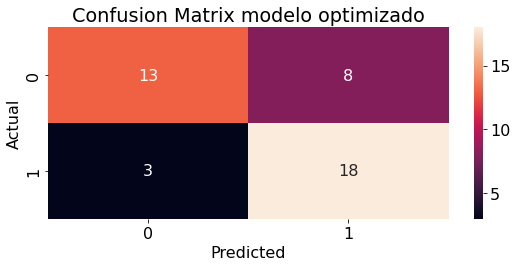

In [157]:
metricas_modelo(X_train, y_train,y_test,predicciones_test,"modelo optimizado",0)

# Prueba con unseen

In [163]:
# dfAll = dfUnseen.copy()
dfAll = df_sel.copy()
print("Cantidad de columnas: ",len(dfAll.columns))
print("Cantidad de filas: ",len(dfAll))

Cantidad de columnas:  2
Cantidad de filas:  213


In [164]:
dfAll.groupby('include?').count()

,text_to_proc
include?,
0,128
1,85


In [165]:
# Reparto train y test
# ==============================================================================
X_test = dfAll['text_to_proc']
y_test = dfAll['include?']

# X_train, X_test, y_train, y_test = train_test_split(
#     datos_X,
#     datos_y,
#     test_size = 0.99,
#     random_state = 42
# )

In [166]:
tfidf_test  = tfidf_vectorizador.transform(X_test)

In [167]:
predicciones_test = modelo_final.predict(X=tfidf_test)


 **********  modelo optimizado  *************

Number of training samples: 18
Unlabeled samples in training set: 0

Number of test samples: 213
Unlabeled samples in training set: 0

Classifications true: 142
Classifications false: 71
Classifications error: 33.33%

F1 score (Puntaje)   : 66.67%
Accuracy (Exactitud) : 66.67%
Precision (Precision): 55.47%
Recall (Sensibilidad): 83.53%




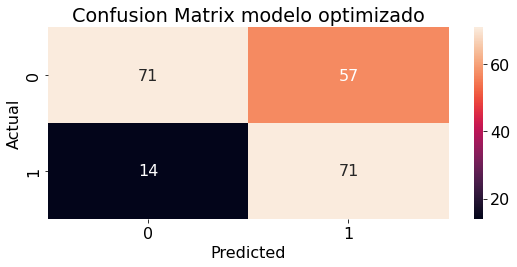

In [168]:
metricas_modelo(X_train, y_train,y_test,predicciones_test,"modelo optimizado",0)

In [45]:
matriz = confusion_matrix(y_test,predicciones_test)
leete = matriz[0][1] + matriz[1][1]
noleete = matriz[0][0]   + matriz[1][0] 
ahorro = noleete * 100 / (leete + noleete) 
print(f"Leete {leete} te salvaste de leer {noleete}")
print(f"Te ahorre de leer {ahorro} %")

Leete 79 te salvaste de leer 73
Te ahorre de leer 48.026315789473685 %


#Prueba con dataset completo normalizado



In [162]:
import pandas as pd

url = 'https://raw.githubusercontent.com/NestorBalich/IA-ML/main/665_papers_eda_nomalizados.csv'

dfAll = pd.read_csv(url, encoding='latin-1', sep=',')

print("Cantidad de columnas: ",len(dfAll.columns))
print("Cantidad de filas: ",len(dfAll))

Cantidad de columnas:  10
Cantidad de filas:  665


In [161]:
#resultado esperado
dfAll['include?'].value_counts()

0    580
1     85
Name: include?, dtype: int64

In [53]:
tfidf_test  = tfidf_vectorizador.transform(X_test)

In [54]:
predicciones_test = modelo_final.predict(X=tfidf_test)

In [55]:
# Reparto train y test
# ==============================================================================
datos_X = dfAll['text_to_proc']
datos_y = dfAll['include?']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.9,
    random_state = 42
)


 **********  modelo optimizado  *************

Number of training samples: 66
Unlabeled samples in training set: 0

Number of test samples: 599
Unlabeled samples in training set: 0

Classifications true: 369
Classifications false: 230
Classifications error: 38.4%

F1 score (Puntaje)   : 29.45%
Accuracy (Exactitud) : 61.6%
Precision (Precision): 19.28%
Recall (Sensibilidad): 62.34%




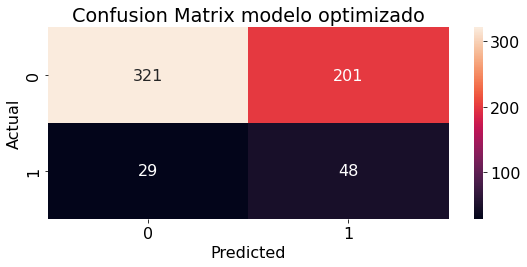

In [78]:
metricas_modelo(X_train, y_train,y_test,predicciones_test,"modelo optimizado",0)

In [57]:
matriz = confusion_matrix(y_test,predicciones_test)
leete = matriz[0][1] + matriz[1][1]
noleete = matriz[0][0]   + matriz[1][0] 
ahorro = noleete * 100 / (leete + noleete) 
print(f"Leete {leete} te salvaste de leer {noleete}")
print(f"Te ahorre de leer {ahorro} %")

Leete 249 te salvaste de leer 350
Te ahorre de leer 58.43071786310517 %


Include esperados en 0 : 580

Include esperados en 1 : 80




In [74]:
len_to = dfAll.groupby('include?')['include?'].count()

porc_0_true =   matriz[0][1] * 100 / len_to[0]
porc_1_true =   matriz[1][1] * 100 / len_to[1]

print(f"Asierto en 0 = { round(porc_0_true,2)}%")
print(f"Asierto en 1 = { round(porc_1_true,2)}%")

Asierto en 0 = 34.66%
Asierto en 1 = 56.47%
